In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('odi.csv')

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


# Average Score of each country

In [4]:
import seaborn as sns

In [6]:
s=df.groupby('bat_team')['total'].mean()
s=s.to_frame()
s.columns=["mean_score"]
#s.index.name=None

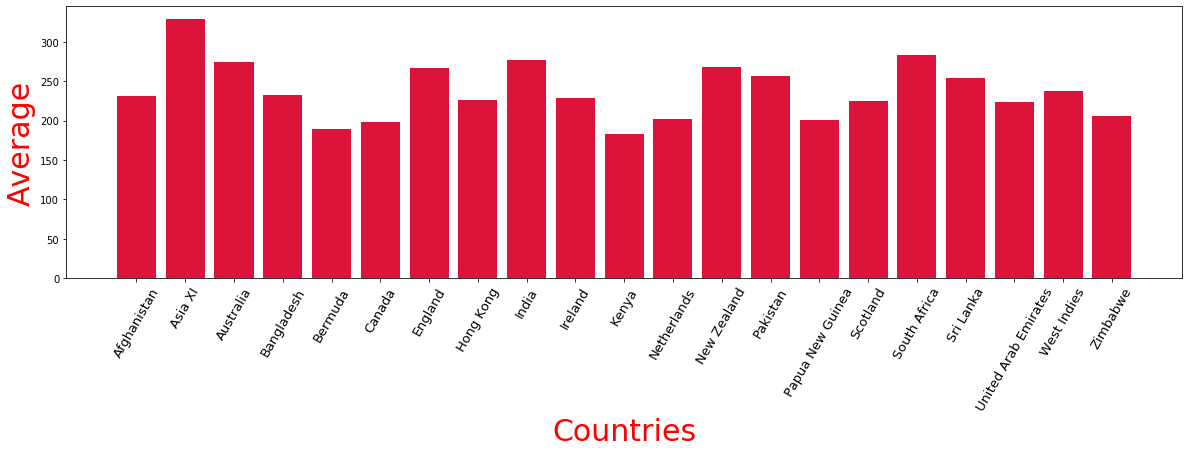

In [7]:
%matplotlib inline
fig=plt.figure(figsize=(20,5))
plt.bar(s.index,s['mean_score'],color="crimson")
plt.xticks(s.index,fontsize=13, rotation=60)
plt.xlabel("Countries",fontsize=30,color='red')
plt.ylabel("Average",fontsize=30,color='red')
plt.show()

In [9]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [10]:
X=df.iloc[:,[3,4,7,8,9]].values

In [11]:
X

array([['England', 'Ireland', 0, 0, 0.1],
       ['England', 'Ireland', 0, 0, 0.2],
       ['England', 'Ireland', 4, 0, 0.3],
       ...,
       ['Sri Lanka', 'Zimbabwe', 201, 8, 49.4],
       ['Sri Lanka', 'Zimbabwe', 202, 8, 49.5],
       ['Sri Lanka', 'Zimbabwe', 203, 8, 49.6]], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
labelencoder_X=LabelEncoder()

In [14]:
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,1] = labelencoder_X.fit_transform(X[:,1])

In [15]:
X

array([[6, 9, 0, 0, 0.1],
       [6, 9, 0, 0, 0.2],
       [6, 9, 4, 0, 0.3],
       ...,
       [17, 20, 201, 8, 49.4],
       [17, 20, 202, 8, 49.5],
       [17, 20, 203, 8, 49.6]], dtype=object)

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
onehotencoder = OneHotEncoder(categorical_features=[0,1])
X = onehotencoder.fit_transform(X).toarray()

C:\Users\Sridhar\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Sridhar\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [18]:
X

array([[0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e-01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 2.00e-01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 4.00e+00, 0.00e+00, 3.00e-01],
       ...,
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 2.01e+02, 8.00e+00, 4.94e+01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 2.02e+02, 8.00e+00, 4.95e+01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 2.03e+02, 8.00e+00, 4.96e+01]])

In [19]:
y=df.iloc[:,[14]].values

In [20]:
y

array([[301],
       [301],
       [301],
       ...,
       [203],
       [203],
       [203]], dtype=int64)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
X_train

array([[  0. ,   0. ,   0. , ..., 145. ,   7. ,  40.3],
       [  0. ,   0. ,   0. , ..., 245. ,   6. ,  36.1],
       [  0. ,   0. ,   0. , ..., 121. ,   5. ,  31.3],
       ...,
       [  0. ,   0. ,   0. , ..., 199. ,   3. ,  33.4],
       [  0. ,   0. ,   0. , ..., 140. ,   3. ,  31.2],
       [  0. ,   0. ,   1. , ..., 250. ,   2. ,  40.6]])

In [24]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [25]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = lin_reg.predict(X_test)
y_pred

array([[251.98160654],
       [254.59710341],
       [268.27278297],
       ...,
       [276.10739342],
       [361.96426753],
       [297.14817261]])

In [27]:
y_test

array([[316],
       [332],
       [253],
       ...,
       [270],
       [249],
       [294]], dtype=int64)

In [34]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressorD = DecisionTreeRegressor(random_state = 0)
regressorD.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [35]:
y_predD = regressorD.predict(X_test)
y_predD

array([249.64705882, 243.5       , 222.5       , ..., 250.        ,
       249.        , 178.5       ])

In [30]:
#RandomForestRegression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X,y)

C:\Users\Sridhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [32]:
# Predicting a new result
y_predR = regressor.predict(X_test)
y_predR

array([257.32880723, 247.90315127, 243.36413534, ..., 228.32513095,
       249.        , 199.68001135])